In [18]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util.visualization import *
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_predict
from util.plotting import *
from src.sampling.Sampling import sampling_sndl
from Synthetic import *

## Synthetic Experiment

In [19]:
# Generate primary set of networks
ER_synthetic(n=1000, p=0.10)
WS_synthetic(n=1000, k=10, p=0.10)
BA_synthetic(n=1000, m=5)
CM_synthetic(n=1000, method="BA", m=5)

# Generate similar networks with minor parameter tweaks
ER_synthetic(n=1000, p=0.11)  # Slight change in p
WS_synthetic(n=1000, k=10, p=0.12)  # Slight change in p
BA_synthetic(n=1000, m=6)  # Slight change in m
CM_synthetic(n=1000, method="BA", m=6)  # Adjusted degree sequence


### Synthetic Experiment - 3-baseline combinations

Getting save path...
Loading precomputed dictionary from dictionaries/ER_n1000_p0.10_WS_n1000_k10_p0.10_BA_n1000_m5_bs500_k80_xi6_nc30_iter300_bi0.pkl
Loading dictionary...
Plotting...
Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_n1000_p0.10_WS_n1000_k10_p0.10_CM_n1000_methodBA_m5_bs500_k80_xi6_nc30_iter300_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_n1000_p0.10
Calling `sndl_equalEdge` and computing dictionary for WS_n1000_k10_p0.10
Calling `sndl_equalEdge` and computing dictionary for CM_n1000_methodBA_m5


100%|██████████| 300/300 [01:35<00:00,  3.14it/s]


Saving dictionary...
Plotting...
Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/ER_n1000_p0.10_BA_n1000_m5_CM_n1000_methodBA_m5_bs500_k80_xi6_nc30_iter300_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for ER_n1000_p0.10
Calling `sndl_equalEdge` and computing dictionary for BA_n1000_m5
Calling `sndl_equalEdge` and computing dictionary for CM_n1000_methodBA_m5


100%|██████████| 300/300 [01:48<00:00,  2.77it/s]


Saving dictionary...
Plotting...
Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/WS_n1000_k10_p0.10_BA_n1000_m5_CM_n1000_methodBA_m5_bs500_k80_xi6_nc30_iter300_bi0.pkl
Calling `sndl_equalEdge` and computing dictionary for WS_n1000_k10_p0.10
Calling `sndl_equalEdge` and computing dictionary for BA_n1000_m5
Calling `sndl_equalEdge` and computing dictionary for CM_n1000_methodBA_m5


100%|██████████| 300/300 [01:35<00:00,  3.14it/s]


Saving dictionary...
Plotting...


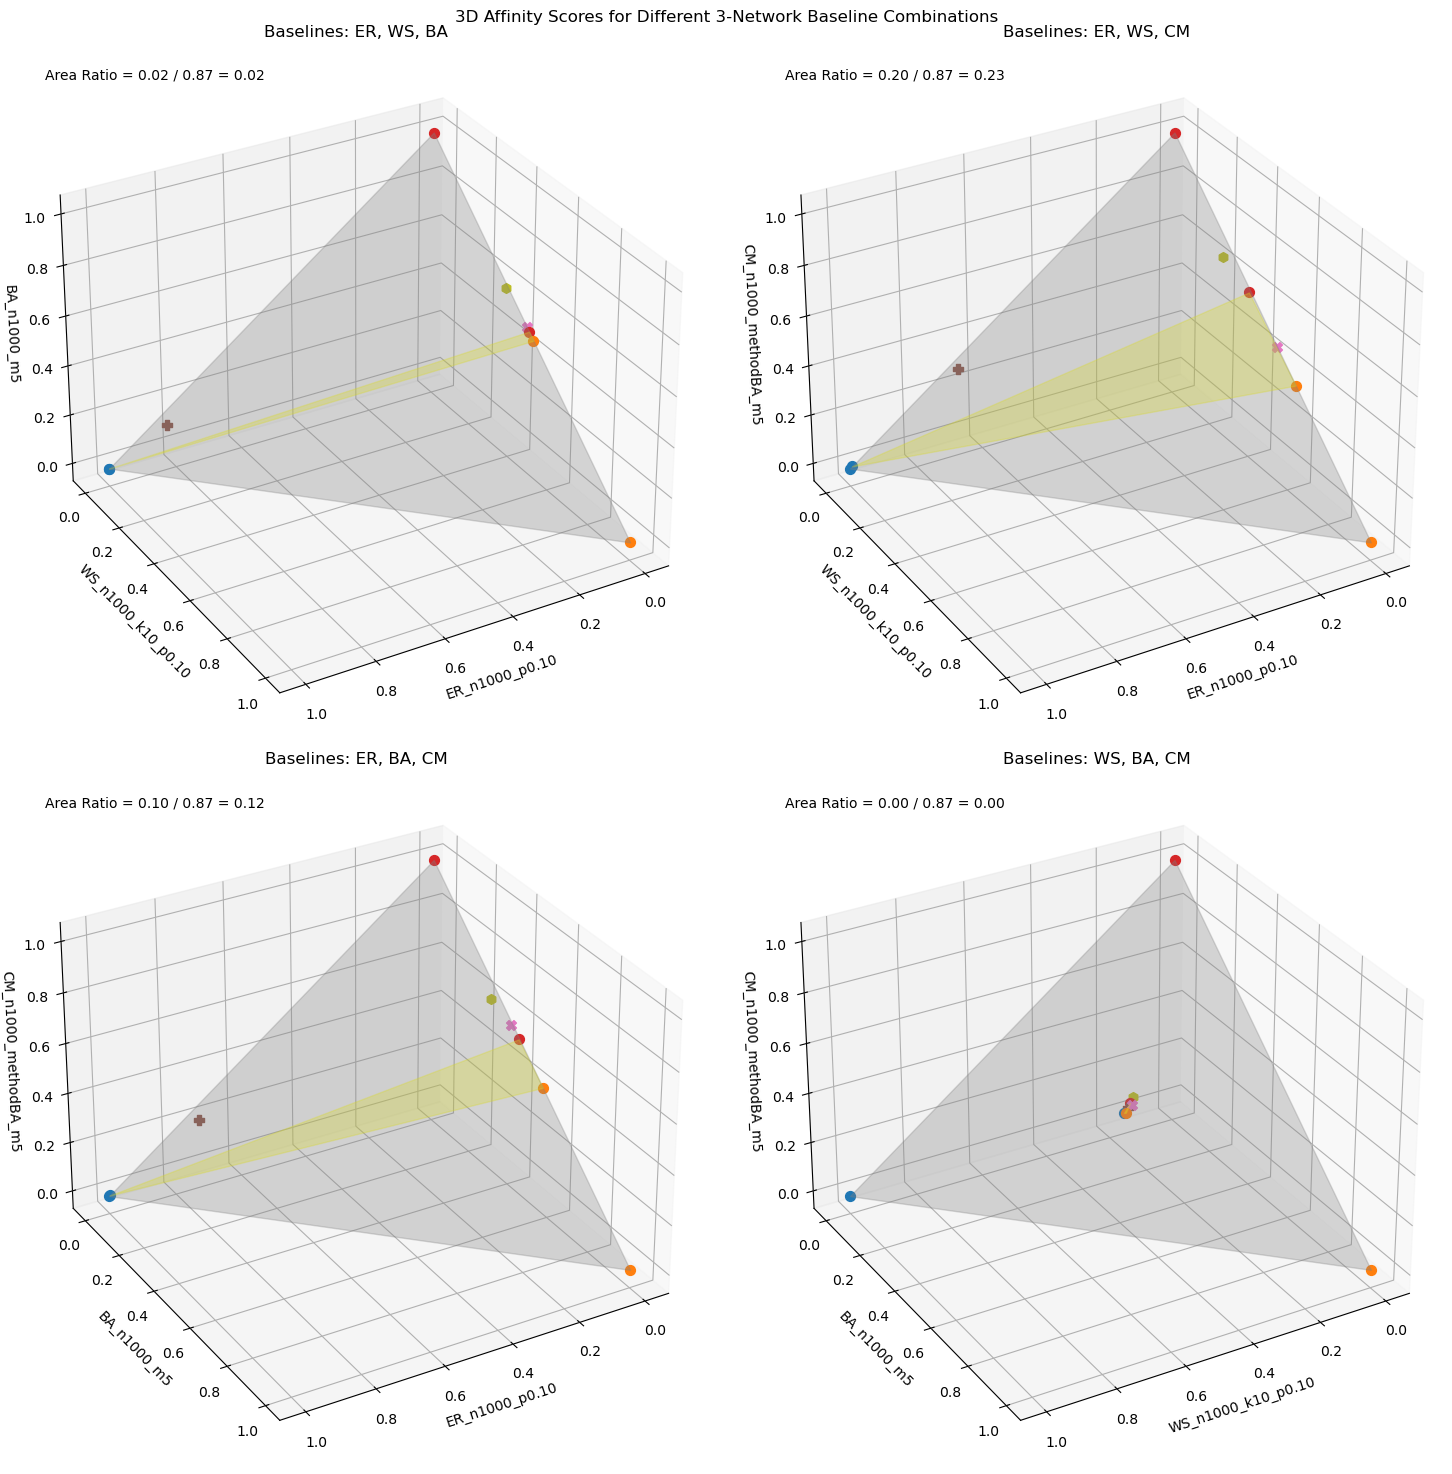

In [34]:
# Define the network list with both original and modified versions
ntwk_list = [
    'ER_n1000_p0.10', 'WS_n1000_k10_p0.10', 'BA_n1000_m5', 'CM_n1000_methodBA_m5',
    'ER_n1000_p0.11', 'WS_n1000_k10_p0.12', 'BA_n1000_m6', 'CM_n1000_methodBA_m6'
]

# Define baseline and modified pairs
original_ntwks = ntwk_list[:4]
modified_ntwks = ntwk_list[4:]

# Prepare a 2x2 grid layout for the four subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15), subplot_kw={'projection': '3d'})
fig.suptitle("3D Affinity Scores for Different 3-Network Baseline Combinations")

# Loop over each combination of 3 baselines out of 4 original networks
for idx, baseline_indices in enumerate(combinations(range(4), 3)):
    # Derive row and col for each subplot in a 2x2 layout
    row, col = divmod(idx, 2)

    # Define baseline and modified subsets based on the current combination
    baseline_subset = [original_ntwks[i] for i in baseline_indices]
    modified_subset = [modified_ntwks[i] for i in baseline_indices]
    
    # Combine the original and modified subsets
    all_subset = baseline_subset + modified_subset  # Contains 6 networks

    # Compute dictionary for this baseline subset (original networks only)
    W, beta, H = compute_latent_motifs_and_dictionary(
        baseline_subset, base_sample_size=500, k=80, xi=6, n_components=30,
        iterations=300, baseline_i=0, skip_folded_hom=False, average=False, times=1
    )

    # Compute affinity scores for the 6 networks (original + modified)
    affinity_scores = compute_affinity_scores_for_all_networks(all_subset, W, beta)

    # Plot 3D affinity scores on the specific subplot
    plot_3d_affinity_scores(
        all_subset, affinity_scores, baseline_i=0, view_angle=(30, 60), 
        average=False, times=1, ax=axs[row, col]
    )

    # Set the title for each subplot with baseline names
    baseline_names = ', '.join([original_ntwks[i].split('_')[0] for i in baseline_indices])
    axs[row, col].set_title(f"Baselines: {baseline_names}")

# Adjust layout and display the combined plot
plt.tight_layout()
plt.show()


### Synthetic Experiment - 4-baseline radar plot

Loading dictionary...


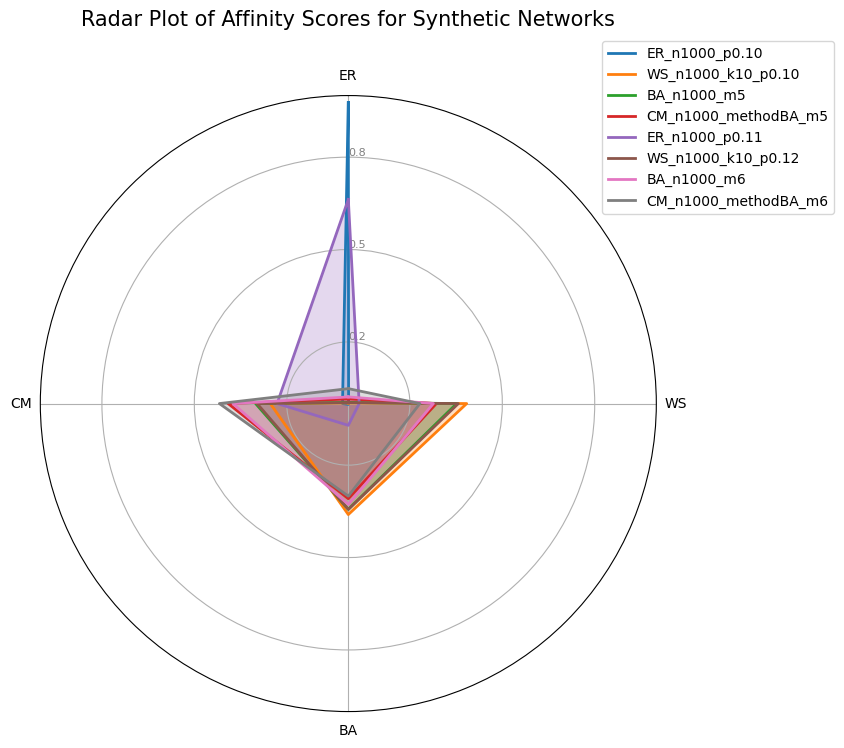

In [28]:
# Usage Example
ntwk_list = ['ER_n1000_p0.10', 'WS_n1000_k10_p0.10', 'BA_n1000_m5', 'CM_n1000_methodBA_m5',
             'ER_n1000_p0.11', 'WS_n1000_k10_p0.12', 'BA_n1000_m6', 'CM_n1000_methodBA_m6']

W, beta, H = compute_latent_motifs_and_dictionary_4_baseline(
    ntwk_list, base_sample_size=500, k=70, xi=5, n_components=25, iterations=250,
    baseline_i=0, skip_folded_hom=False, average=False, times=1
)

affinity_scores = compute_affinity_scores_for_all_networks_4_baseline(ntwk_list, W, beta)

plot_radar_affinity_scores(ntwk_list, affinity_scores, title="Radar Plot of Affinity Scores for Synthetic Networks")

In [31]:
# Adjusted network generation for more distinct structures
ER_synthetic(n=1000, p=0.05)
WS_synthetic(n=1000, k=15, p=0.20)
BA_synthetic(n=1000, m=3)
CM_synthetic(n=1000, method="powerlaw", exponent=2.8)

# Corresponding modified networks with slight adjustments
ER_synthetic(n=1000, p=0.06)
WS_synthetic(n=1000, k=15, p=0.22)
BA_synthetic(n=1000, m=4)
CM_synthetic(n=1000, method="powerlaw", exponent=2.9)


100%|██████████| 300/300 [01:46<00:00,  2.82it/s]


Saving dictionary...


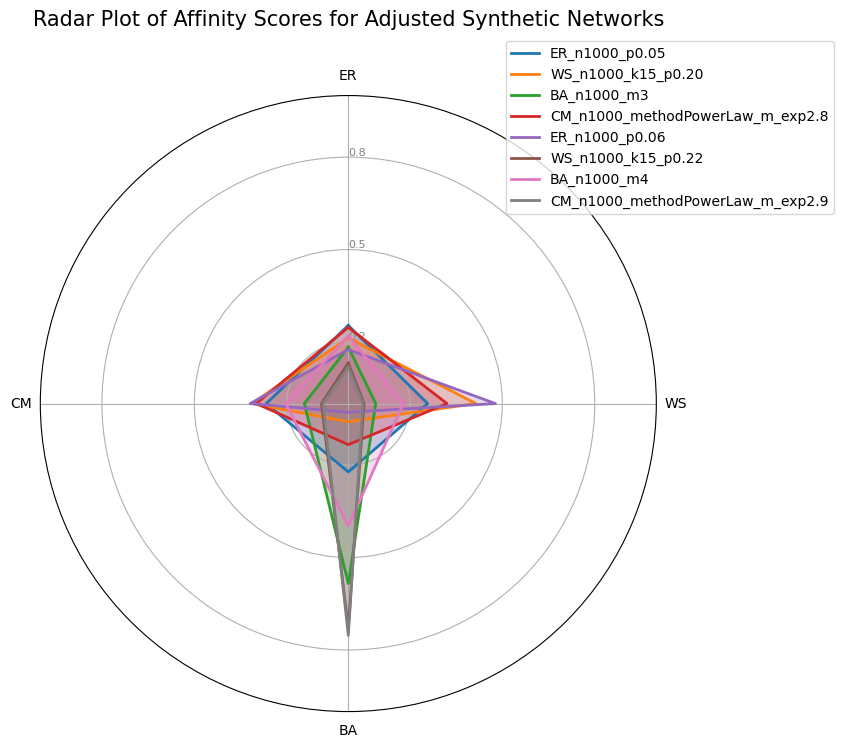

In [32]:
# Define the new network list
ntwk_list = [
    'ER_n1000_p0.05', 'WS_n1000_k15_p0.20', 'BA_n1000_m3', 'CM_n1000_methodPowerLaw_m_exp2.8',
    'ER_n1000_p0.06', 'WS_n1000_k15_p0.22', 'BA_n1000_m4', 'CM_n1000_methodPowerLaw_m_exp2.9'
]

# Run dictionary learning with adjusted parameters for enhanced sparsity and differentiation
W, beta, H = compute_latent_motifs_and_dictionary_4_baseline(
    ntwk_list, base_sample_size=500, k=80, xi=6, n_components=30, iterations=300,
    baseline_i=0, skip_folded_hom=False, average=False, times=1
)

# Compute and plot radar chart with the adjusted networks and learning parameters
affinity_scores = compute_affinity_scores_for_all_networks_4_baseline(ntwk_list, W, beta)

plot_radar_affinity_scores(ntwk_list, affinity_scores, title="Radar Plot of Affinity Scores for Adjusted Synthetic Networks")


# Biological Networks

Getting save path...
Loading precomputed dictionary from dictionaries/bio-human_bio-plant_bio-yeast_bs500_k60_xi7_nc25_iter250_bi0.pkl
Loading dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-human_bio-plant_bio-yeast_etc_bs500_k60_nc25_iter250_bi0_single.png


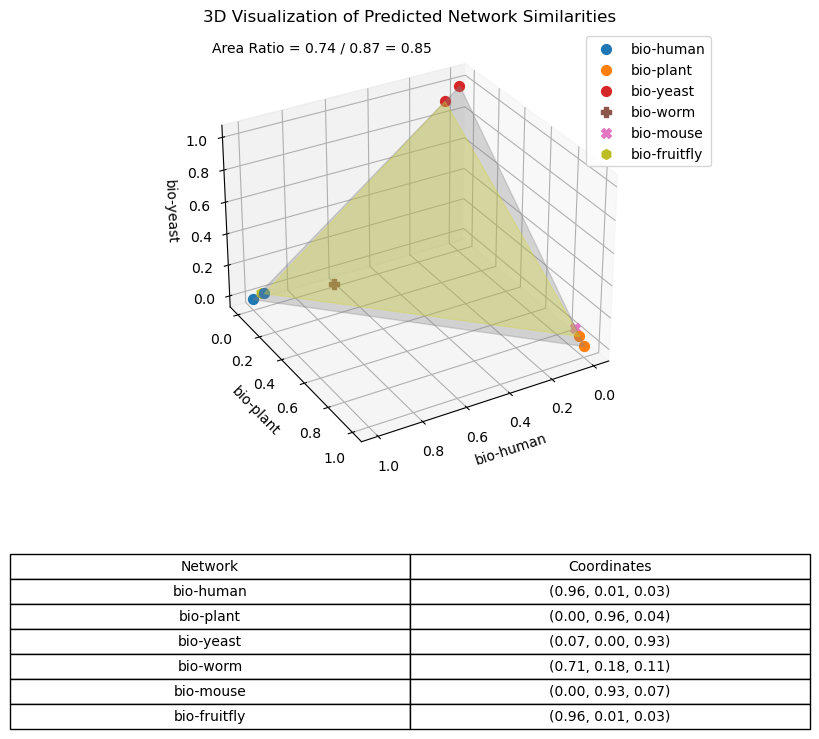

In [2]:
ntwk_list = ['bio-human', 'bio-plant', 'bio-yeast', 'bio-worm', 'bio-mouse', 'bio-fruitfly']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=7, baseline_i=0, skip_folded_hom=False,
                   average=False, times=1)

Getting save path...
Computing dictionary for baseline 0 and saving to dictionaries/bio-yeast_bio-worm_bio-fruitfly_bs500_k60_xi5_nc25_iter250_bi0_avg.pkl
Calling `sndl_equalEdge` and computing dictionary for bio-yeast
Calling `sndl_equalEdge` and computing dictionary for bio-worm
Calling `sndl_equalEdge` and computing dictionary for bio-fruitfly


100%|██████████| 250/250 [01:13<00:00,  3.39it/s]


Saving dictionary...
Plotting...
Adding a table...
Plot saved to output/triangle_plot\bio-yeast_bio-worm_bio-fruitfly_etc_bs500_k60_nc25_iter250_bi0_avg.png


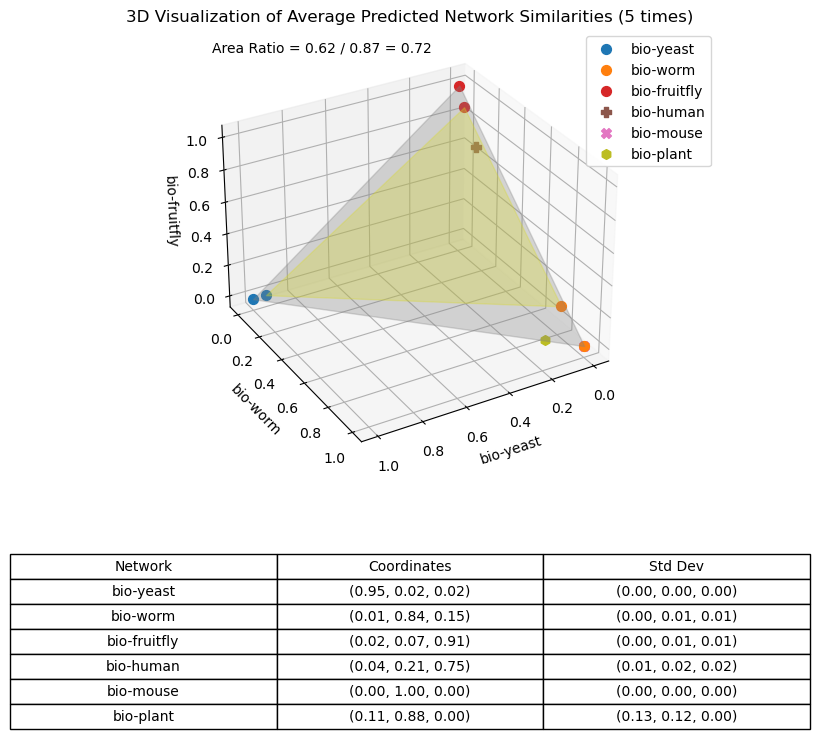

In [3]:
ntwk_list = ['bio-yeast', 'bio-worm', 'bio-fruitfly', 'bio-human', 'bio-mouse', 'bio-plant']
plot_3d_prediction(ntwk_list, base_sample_size=500, k=60, n_components=25, iterations=250, 
                   xi=5, baseline_i=0, skip_folded_hom=False,
                   average=True, times=5)